In [ ]:
import pandas as pd
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Read the dataset into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Portfolio/Earthquake Analysis/database.csv')
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [ ]:
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

##### Based on the provided dataset samples, here's an explanation of the columns:

1. <b style='color:green'>Date:</b> The date of the earthquake occurrence.
2. <b style='color:green'>Time:</b> The time of the earthquake occurrence.
3. <b style='color:green'>Latitude:</b> The latitude coordinates of the earthquake epicenter.
4. <b style='color:green'>Longitude:</b> The longitude coordinates of the earthquake epicenter.
5. <b style='color:green'>Type:</b> Indicates the type of seismic event, in this case, "Earthquake."
6. <b style='color:green'>Depth:</b> The depth of the earthquake hypocenter (focus) below the Earth's surface.
7. <b style='color:green'>Depth Error:</b> Error associated with the depth measurement, if available.
8. <b style='color:green'>Depth Seismic Stations:</b> The number of seismic stations used to determine the earthquake's depth.
9. <b style='color:green'>Magnitude:</b> The magnitude of the earthquake, indicating its relative size or energy release.
10. <b style='color:green'>Magnitude Type:</b> The type of magnitude scale used to measure the earthquake, such as "MW" (Moment Magnitude) or "ML" (Local Magnitude).
11. <b style='color:green'>Magnitude Error:</b> Error associated with the magnitude measurement, if available.
12. <b style='color:green'>Magnitude Seismic Stations:</b> The number of seismic stations used to determine the earthquake's magnitude.
13. <b style='color:green'>Azimuthal Gap:</b> The azimuthal gap measures the distribution of azimuthal angles between seismic stations and provides information about the earthquake's source region.
14. <b style='color:green'>Horizontal Distance:</b> The horizontal distance between the earthquake epicenter and the nearest station, providing information about the earthquake's location.
15. <b style='color:green'>Horizontal Error:</b> Error associated with the horizontal distance measurement, if available.
16. <b style='color:green'>Root Mean Square:</b> The root mean square value of the seismic signal, indicating the quality of earthquake data.
17. <b style='color:green'>ID:</b> A unique identifier for each earthquake event.
18. <b style='color:green'>Source:</b> The source of the earthquake data, such as "ISCGEM" or "NN."
19. <b style='color:green'>Location Source:</b> The source of location information for the earthquake, such as "ISCGEM" or "NN."
20. <b style='color:green'>Magnitude Source:</b> The source of magnitude information for the earthquake, such as "ISCGEM" or "NN."
21. <b style='color:green'>Status:</b> Indicates the status of the earthquake event, such as "Automatic" or "Reviewed."

These columns provide essential information about each earthquake event, including its date, time, location, magnitude, depth, and associated measurement errors. The dataset appears to contain historical earthquake data spanning from January 2, 1965, to December 30, 2016.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2088\4008441893.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


<Axes: >

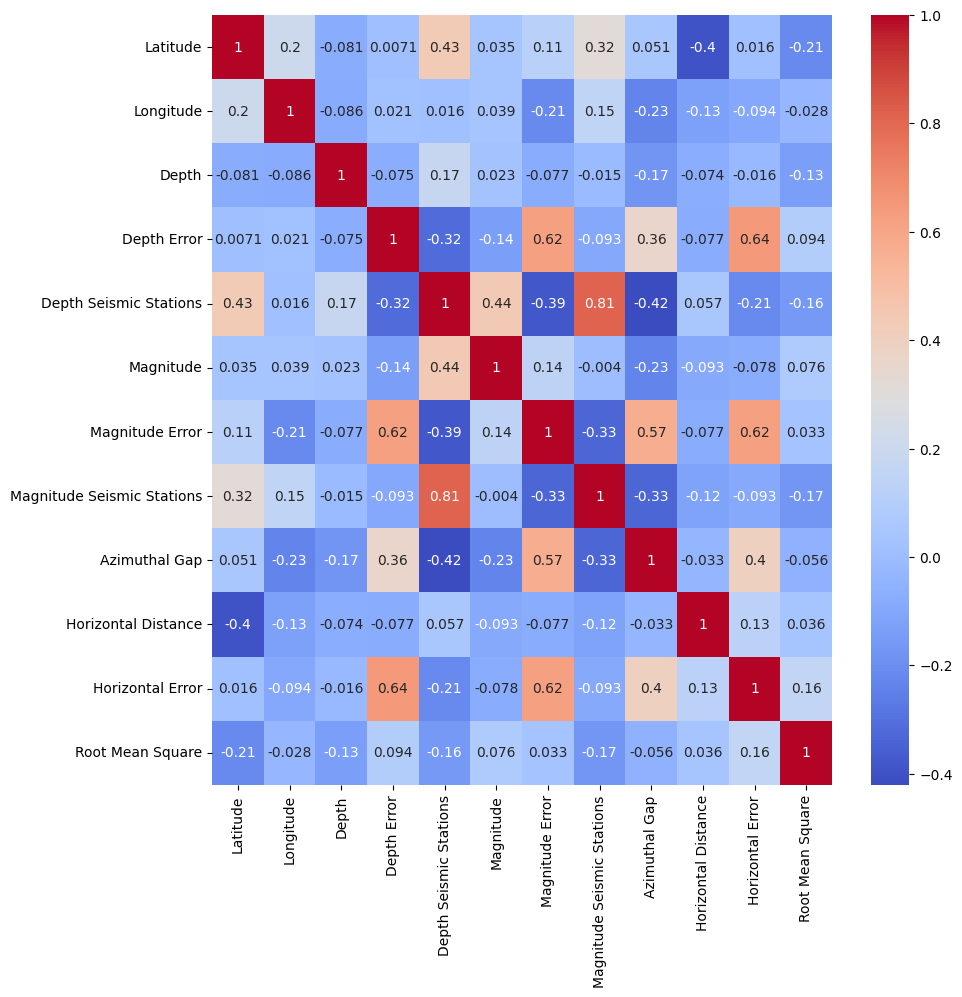

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation_matrix, cmap='coolwarm', annot=True)

In [ ]:
data.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [ ]:
# Select only the numerical columns for statistical analysis
numeric_data = data.select_dtypes(include='number')
numeric_data.isnull().sum()
numeric_data.drop(['Depth Error','Depth Seismic Stations','Magnitude Error','Magnitude Seismic Stations','Azimuthal Gap','Horizontal Distance','Horizontal Error'], axis=1, inplace=True)

In [ ]:
numeric_data['Root Mean Square'] = numeric_data['Root Mean Square'].fillna(numeric_data['Root Mean Square'].median())
numeric_data.isnull().sum()

Latitude            0
Longitude           0
Depth               0
Magnitude           0
Root Mean Square    0
dtype: int64

In [ ]:
# complete statistical analysis
column_means = numeric_data.mean()
column_medians = numeric_data.median()
column_modes = numeric_data.mode().iloc[0]
skewness = numeric_data.skew()
kurtosis = numeric_data.kurtosis()
column_variances = numeric_data.var()
column_standard_deviations = numeric_data.std()
column_ranges = numeric_data.max() - numeric_data.min()
column_quantiles = numeric_data.quantile([0.25, 0.5, 0.75])

In [ ]:
# Print the results
print("\nColumn Means:")
print(column_means)

print("\nColumn Medians:")
print(column_medians)

print("\nColumn Modes:")
print(column_modes)


Column Means:
Latitude             1.679033
Longitude           39.639961
Depth               70.767911
Magnitude            5.882531
Root Mean Square     1.016887
dtype: float64

Column Medians:
Latitude             -3.5685
Longitude           103.9820
Depth                33.0000
Magnitude             5.7000
Root Mean Square      1.0000
dtype: float64

Column Modes:
Latitude             -5.902
Longitude           126.777
Depth                10.000
Magnitude             5.500
Root Mean Square      1.000
Name: 0, dtype: float64


In [ ]:
print("\nSkewness:")
print(skewness)

print("\nKurtosis:")
print(kurtosis)

print("\nColumn Variances:")
print(column_variances)


Skewness:
Latitude            0.101804
Longitude          -0.600646
Depth               3.290683
Magnitude           1.848346
Root Mean Square    0.069758
dtype: float64

Kurtosis:
Latitude            -0.602892
Longitude           -1.249877
Depth               10.456851
Magnitude            4.388922
Root Mean Square     7.913271
dtype: float64

Column Variances:
Latitude              906.803784
Longitude           15753.251728
Depth               15043.488013
Magnitude               0.178985
Root Mean Square        0.026447
dtype: float64


In [ ]:
print("\nColumn Standard Deviations:")
print(column_standard_deviations)

print("\nColumn Ranges:")
print(column_ranges)

print("\nColumn Quantiles:")
print(column_quantiles)


Column Standard Deviations:
Latitude             30.113183
Longitude           125.511959
Depth               122.651898
Magnitude             0.423066
Root Mean Square      0.162625
dtype: float64

Column Ranges:
Latitude            163.085
Longitude           359.995
Depth               701.100
Magnitude             3.600
Root Mean Square      3.440
dtype: float64

Column Quantiles:
      Latitude  Longitude    Depth  Magnitude  Root Mean Square
0.25 -18.65300  -76.34975  14.5225        5.6              0.94
0.50  -3.56850  103.98200  33.0000        5.7              1.00
0.75  26.19075  145.02625  54.0000        6.0              1.10


In [ ]:
# Data preprocessing
data.isnull().sum()
data.drop(['Depth Error','Depth Seismic Stations','Magnitude Error','Magnitude Seismic Stations','Azimuthal Gap','Horizontal Distance','Horizontal Error'], axis=1, inplace=True)
data['Root Mean Square'] = data['Root Mean Square'].fillna(data['Root Mean Square'].median())
data['Magnitude Type'] = data['Magnitude Type'].fillna(data['Magnitude Type'].mode()[0])

In [ ]:
data.isnull().sum()  ## null values treated

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      0
Root Mean Square    0
ID                  0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

In [ ]:
# let's check outliers
data.describe()   ## no outlier exist

,Latitude,Longitude,Depth,Magnitude,Root Mean Square
count,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000
mean,1.679033,39.639961,70.767911,5.882531,1.016887
std,30.113183,125.511959,122.651898,0.423066,0.162625
min,-77.080000,-179.997000,-1.100000,5.500000,0.000000
25%,-18.653000,-76.349750,14.522500,5.600000,0.940000
50%,-3.568500,103.982000,33.000000,5.700000,1.000000
75%,26.190750,145.026250,54.000000,6.000000,1.100000
max,86.005000,179.998000,700.000000,9.100000,3.440000


In [ ]:
# now let's convert few categorical columns into numerical to predictive modeling
data.describe(include='object')

'''there are six object columns which need to be converted into numeric for predictive modelling:
Type, Magnitude Type, Source, Location Source, Magnitude Source, Status'''
# But we will perform it later. let's first perform EDA
obj_col = ['Type', 'Magnitude Type', 'Source', 'Location Source', 'Magnitude Source', 'Status']
data.describe(include='object')

,Date,Time,Type,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
count,23412,23412,23412,23412,23412,23412,23412,23412,23412
unique,12401,20472,4,10,23412,13,48,24,2
top,03/11/2011,02:56:58,Earthquake,MW,ISCGEM860706,US,US,US,Reviewed
freq,128,5,23232,7725,1,20630,20350,10458,20773


In [ ]:
# elaborating 6 object columns:
for col in obj_col:
    print(col)
    print(data[col].unique())
    print('_'*100)

Type
['Earthquake' 'Nuclear Explosion' 'Explosion' 'Rock Burst']
____________________________________________________________________________________________________
Magnitude Type
['MW' 'ML' 'MH' 'MS' 'MB' 'MWC' 'MD' 'MWB' 'MWW' 'MWR']
____________________________________________________________________________________________________
Source
['ISCGEM' 'ISCGEMSUP' 'OFFICIAL' 'CI' 'US' 'NC' 'GCMT' 'UW' 'ATLAS' 'NN'
 'SE' 'AK' 'PR']
____________________________________________________________________________________________________
Location Source
['ISCGEM' 'CI' 'US' 'H' 'U' 'G' 'NC' 'B' 'GCMT' 'AG' 'UW' 'SPE' 'HVO'
 'BRK' 'ATLAS' 'AGS' 'PGC' 'BOU' 'SLC' 'OTT' 'AEI' 'AEIC' 'CASC' 'ISK'
 'ATH' 'THE' 'ROM' 'MDD' 'WEL' 'GUC' 'UNM' 'CSEM' 'RSPR' 'JMA' 'NN' 'CAR'
 'SJA' 'TEH' 'BEO' 'UCR' 'SE' 'TUL' 'TAP' 'THR' 'LIM' 'US_WEL' 'AK' 'PR']
____________________________________________________________________________________________________
Magnitude Source
['ISCGEM' 'OFFICIAL' 'CI' 'US' '1020' 'BR

(0, 99.23) %
(1, 0.75) %
(2, 0.02) %
(3, 0.0) %
0: Earthquake
1: Nuclear Explosion
2: Explosion
3: Rock Burst


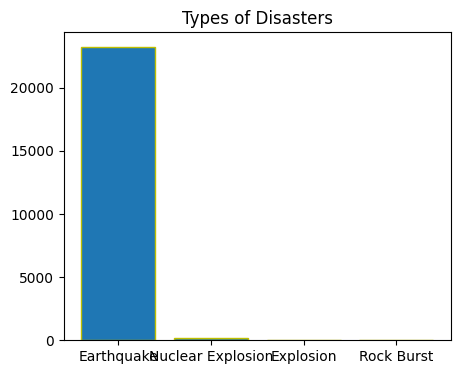

In [ ]:
data['Type'].value_counts(normalize=True)
# let's first visualize the count of cancellation
type = data.Type.value_counts(normalize=True)
for i, elem in enumerate(type):
    print(f'{i, round(elem*100,2)} %')
print('0: Earthquake')
print('1: Nuclear Explosion')
print('2: Explosion')
print('3: Rock Burst')

plt.figure(figsize=(5,4))
plt.title('Types of Disasters')
plt.bar(['Earthquake','Nuclear Explosion','Explosion','Rock Burst'], data.Type.value_counts(), edgecolor='y', width=0.8)
plt.show()

In [ ]:
# Convert datetime string into datetime format
data['Date'] = pd.to_datetime(data['Date'], utc=True)


# Adding more precised datetime columns
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['weekday'] = data['Date'].dt.weekday


In [ ]:
# Convert Time column to datetime format
data['Time'] = pd.to_datetime(data['Time'], utc=True)

# Extract hour, minute, and second
data['Hour'] = data['Time'].dt.hour
data['Minute'] = data['Time'].dt.minute
data['Second'] = data['Time'].dt.second

In [ ]:
data = data[data['Type']=='Earthquake']

In [ ]:
data['Status'].unique()

array(['Automatic', 'Reviewed'], dtype=object)

In [ ]:
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,year,month,day,weekday,Hour,Minute,Second
0,1965-01-02 00:00:00+00:00,2023-06-23 13:44:18+00:00,19.246,145.616,Earthquake,131.6,6.0,MW,1.0,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,2,5,13,44,18
1,1965-01-04 00:00:00+00:00,2023-06-23 11:29:49+00:00,1.863,127.352,Earthquake,80.0,5.8,MW,1.0,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,4,0,11,29,49
2,1965-01-05 00:00:00+00:00,2023-06-23 18:05:58+00:00,-20.579,-173.972,Earthquake,20.0,6.2,MW,1.0,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,5,1,18,5,58
3,1965-01-08 00:00:00+00:00,2023-06-23 18:49:43+00:00,-59.076,-23.557,Earthquake,15.0,5.8,MW,1.0,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,8,4,18,49,43
4,1965-01-09 00:00:00+00:00,2023-06-23 13:32:50+00:00,11.938,126.427,Earthquake,15.0,5.8,MW,1.0,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,9,5,13,32,50


In [ ]:
data2 = data.drop(['Date','Time','Type','ID','Status'], axis=1)

In [ ]:
data2

,Latitude,Longitude,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,year,month,day,weekday,Hour,Minute,Second
0,19.2460,145.6160,131.60,6.0,MW,1.0000,ISCGEM,ISCGEM,ISCGEM,1965,1,2,5,13,44,18
1,1.8630,127.3520,80.00,5.8,MW,1.0000,ISCGEM,ISCGEM,ISCGEM,1965,1,4,0,11,29,49
2,-20.5790,-173.9720,20.00,6.2,MW,1.0000,ISCGEM,ISCGEM,ISCGEM,1965,1,5,1,18,5,58
3,-59.0760,-23.5570,15.00,5.8,MW,1.0000,ISCGEM,ISCGEM,ISCGEM,1965,1,8,4,18,49,43
4,11.9380,126.4270,15.00,5.8,MW,1.0000,ISCGEM,ISCGEM,ISCGEM,1965,1,9,5,13,32,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,38.3917,-118.8941,12.30,5.6,ML,0.1898,NN,NN,NN,2016,12,28,2,8,22,12
23408,38.3777,-118.8957,8.80,5.5,ML,0.2187,NN,NN,NN,2016,12,28,2,9,13,47
23409,36.9179,140.4262,10.00,5.9,MWW,1.5200,US,US,US,2016,12,28,2,12,38,51
23410,-9.0283,118.6639,79.00,6.3,MWW,1.4300,US,US,US,2016,12,29,3,22,30,19
